In [21]:
import numpy as np
import pandas as pd
import librosa
import glob
from pydub import AudioSegment
import matplotlib.pyplot as plt


In [22]:
path='../../data/test/1000170626.ogg'


In [23]:
audio = AudioSegment.from_ogg(path)

# audio duration
duration_seconds=len(audio)/1000.0

print(duration_seconds)
print(duration_seconds/60)

# sampling rate
sr=audio.frame_rate

print(sr)

# the num of channels
print(audio.channels)

# bit depth
bit_depth=audio.sample_width * 8

print(bit_depth)

240.0
4.0
32000
1
32


In [24]:
# read OGG file 
audio = AudioSegment.from_file(path, format="ogg")


# Segment length: 5000 milliseconds (5 seconds)
segment_length = 5000

# total number of segmentations
segments_count = len(audio) // segment_length

# segmenation process
segments = []
for i in range(segments_count):
    start = i * segment_length
    end = start + segment_length
    segment = audio[start:end]
    segments.append(segment)

    # process each audio segment directly here, such as playing, analyzing, etc.
    # segment.export("output_file.ogg", format="ogg")  

# If there are any remaining incomplete parts
if len(audio) % segment_length != 0:
    last_segment = audio[segments_count * segment_length:]
    segments.append(last_segment)
    # this segment can be processed directly the same

In [25]:
segments

In [26]:
print(len(segments))

48


In [27]:
# pick up the slice of the first 5 seconds
slice_0_5sec=segments[0]

print(slice_0_5sec)

In [28]:
# convert audiosegment to array
slice_0_5sec_arr=np.array(slice_0_5sec.get_array_of_samples())

In [29]:
print(slice_0_5sec_arr)
print(len(slice_0_5sec_arr))

[-10451677  -3080098 -14343464 ...  -3341700   3413769   2823165]
160000


In [30]:
# normalization

slice_0_5sec_arr=slice_0_5sec_arr / float(2**(bit_depth-1))

In [31]:
print(slice_0_5sec_arr)

[-0.00486694 -0.00143428 -0.0066792  ... -0.0015561   0.00158966
  0.00131464]


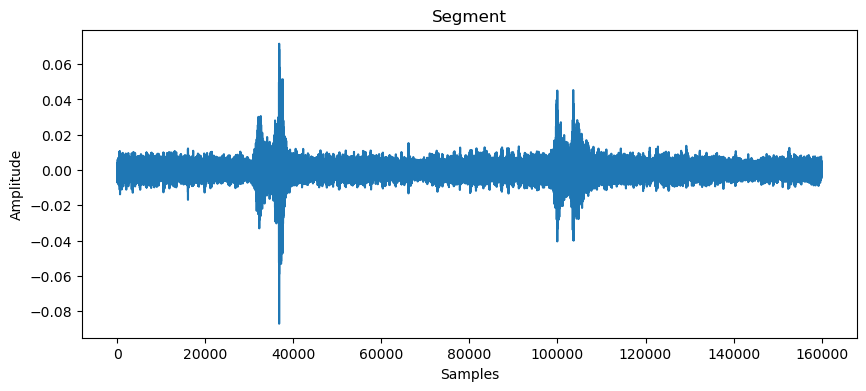

In [32]:
# Draw a waveform
plt.figure(figsize=(10, 4)) 
plt.plot(slice_0_5sec_arr)
plt.title(f'Segment')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

Text(0, 0.5, 'Magnitude')

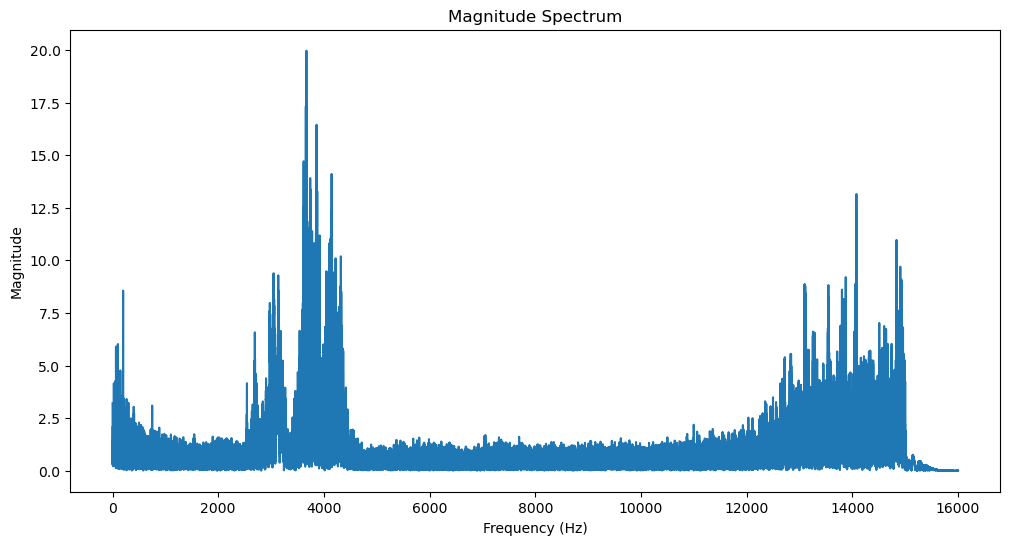

In [33]:
fft = np.fft.fft(slice_0_5sec_arr)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))


half_len = len(magnitude) // 2  # Due to symmetry, only half of the spectrum needs to be plotted
plt.figure(figsize=(12, 6))
plt.plot(frequency[:half_len], magnitude[:half_len])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

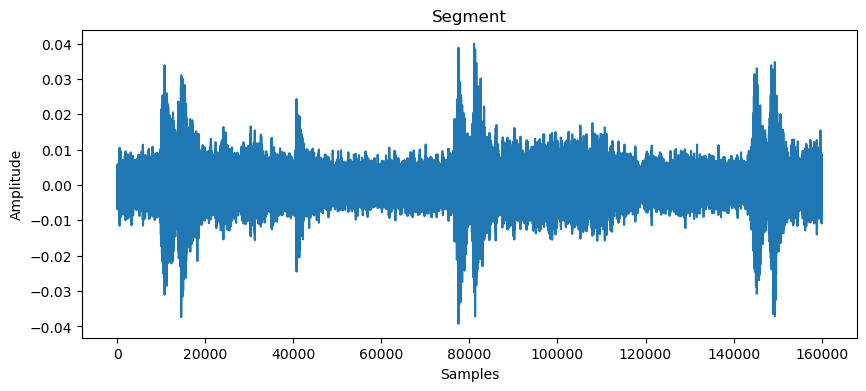

Text(0, 0.5, 'Magnitude')

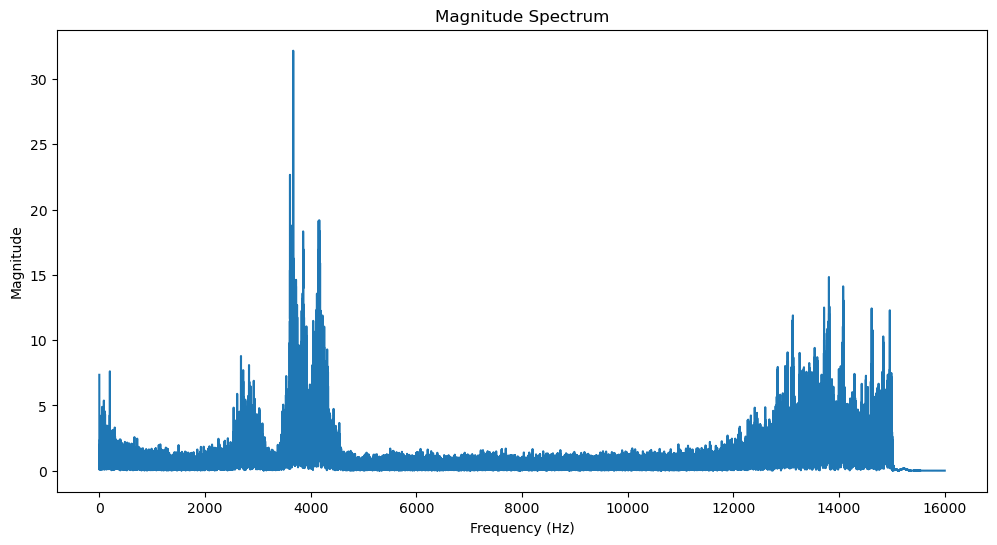

In [34]:
# pick up the slice of the first second 5 seconds
slice_0_5sec=segments[1]

# convert audiosegment to array
slice_0_5sec_arr=np.array(slice_0_5sec.get_array_of_samples())

slice_0_5sec_arr=slice_0_5sec_arr / float(2**(bit_depth-1))


plt.figure(figsize=(10, 4)) 
plt.plot(slice_0_5sec_arr)
plt.title(f'Segment')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


fft = np.fft.fft(slice_0_5sec_arr)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))


half_len = len(magnitude) // 2
plt.figure(figsize=(12, 6))
plt.plot(frequency[:half_len], magnitude[:half_len])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

I want to check if I pich 2 sec slice each time

In [35]:
# read OGG file
audio = AudioSegment.from_file(path, format="ogg")


# Segment length: 2000 milliseconds (2 seconds)
segment_length = 2000

# calculate the total number of segments
segments_count = len(audio) // segment_length

# Segment processing
segments = []
for i in range(segments_count):
    start = i * segment_length
    end = start + segment_length
    segment = audio[start:end]
    segments.append(segment)

# If there are any remaining incomplete parts
if len(audio) % segment_length != 0:
    last_segment = audio[segments_count * segment_length:]
    segments.append(last_segment)

In [36]:
# pick up the slice of the first 5 seconds
slice_0_5sec=segments[0]


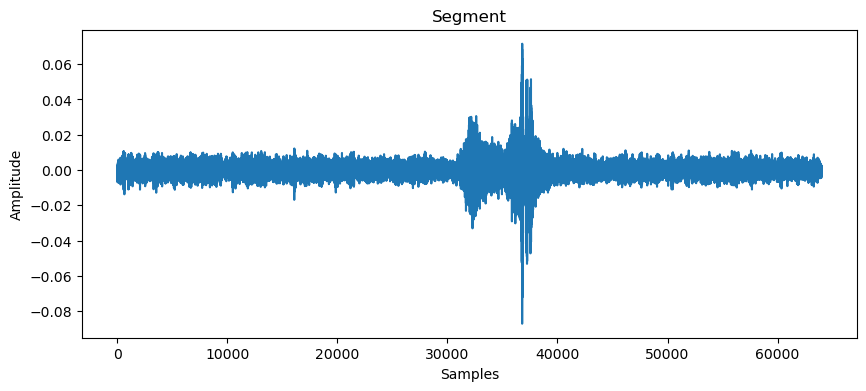

Text(0, 0.5, 'Magnitude')

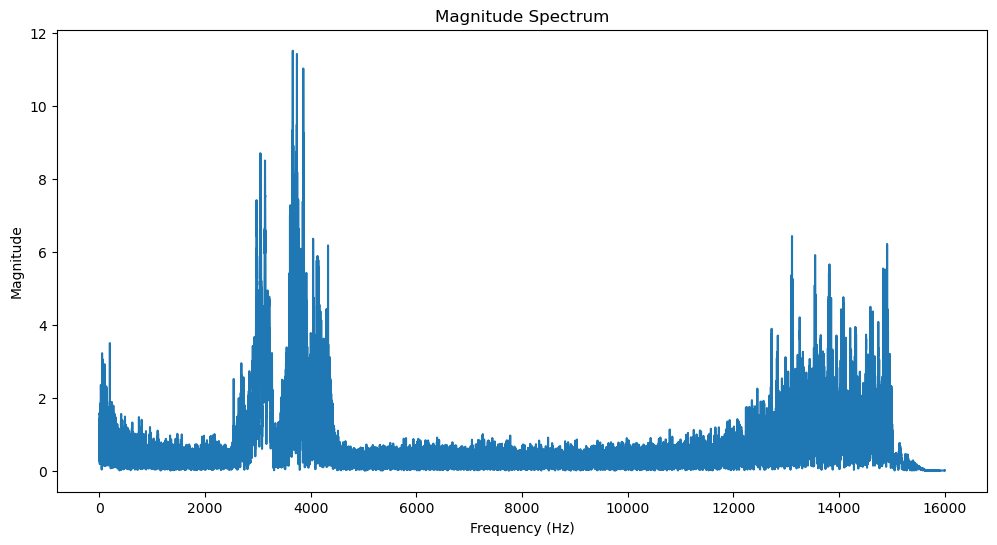

In [37]:
# convert audiosegment to array
slice_0_5sec_arr=np.array(slice_0_5sec.get_array_of_samples())


slice_0_5sec_arr=slice_0_5sec_arr / float(2**(bit_depth-1))


plt.figure(figsize=(10, 4)) 
plt.plot(slice_0_5sec_arr)
plt.title(f'Segment')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


fft = np.fft.fft(slice_0_5sec_arr)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))


half_len = len(magnitude) // 2
plt.figure(figsize=(12, 6))
plt.plot(frequency[:half_len], magnitude[:half_len])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

In [38]:
# pick up the slice of the first second 5 seconds
slice_0_5sec=segments[1]

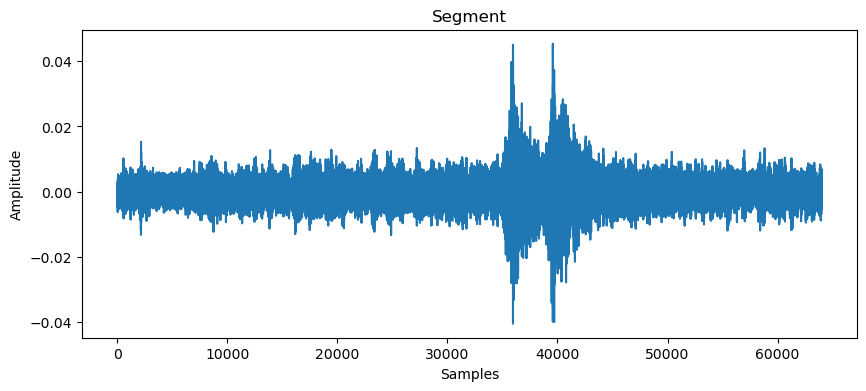

Text(0, 0.5, 'Magnitude')

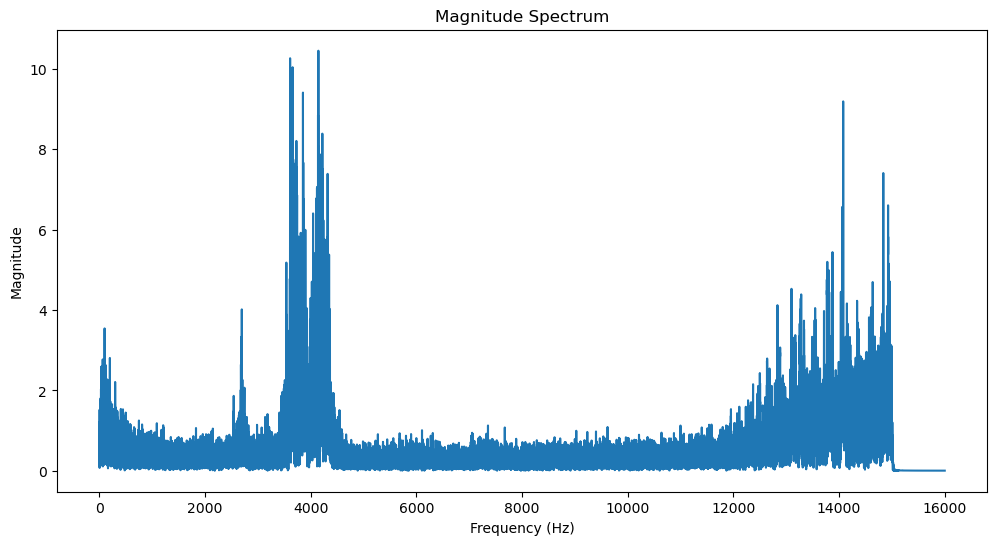

In [39]:
# convert audiosegment to array
slice_0_5sec_arr=np.array(slice_0_5sec.get_array_of_samples())


slice_0_5sec_arr=slice_0_5sec_arr / float(2**(bit_depth-1))


plt.figure(figsize=(10, 4)) 
plt.plot(slice_0_5sec_arr)
plt.title(f'Segment')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


fft = np.fft.fft(slice_0_5sec_arr)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))


half_len = len(magnitude) // 2 
plt.figure(figsize=(12, 6))
plt.plot(frequency[:half_len], magnitude[:half_len])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

It is easy to say that, I could segment the audio from 5 sec to 2 sec, add channel numbers.